In [1]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

In [31]:
df = pd.read_csv('csv/initial_reaction/iPhoneTweetsInitial.csv')

In [32]:
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1438205036262268939,1438205036262268939,2021-09-15 14:16:15 Eastern Daylight Time,2021-09-15,14:16:15,-400,48954798,richeenicole,Thug Passion (supa/soaker)🥷🏽🧜🏽‍♀️🇯🇲,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,3,1438204990389211139,1438204644031873025,2021-09-15 14:16:04 Eastern Daylight Time,2021-09-15,14:16:04,-400,1410841533834797059,obioracouture,FELA,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'abbietayo', 'name': 'Onion C...",NaN,NaN,NaN,NaN
2,4,1438204983892013056,1438204983892013056,2021-09-15 14:16:03 Eastern Daylight Time,2021-09-15,14:16:03,-400,15830701,iphone_news,"All Apple, Always | News, Reviews, Guides",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,5,1438204964669513728,1438191408129662979,2021-09-15 14:15:58 Eastern Daylight Time,2021-09-15,14:15:58,-400,190921309,thegorelander,William Gorelander,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'macworld', 'name': 'Macworld...",NaN,NaN,NaN,NaN
4,11,1438204931094106113,1438204931094106113,2021-09-15 14:15:50 Eastern Daylight Time,2021-09-15,14:15:50,-400,1345357543950802948,phaseb_in,Phase-B,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13738 entries, 0 to 13737
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       13736 non-null  object
 1   id               13737 non-null  object
 2   conversation_id  13737 non-null  object
 3   created_at       13737 non-null  object
 4   date             13737 non-null  object
 5   time             13737 non-null  object
 6   timezone         13737 non-null  object
 7   user_id          13737 non-null  object
 8   username         13736 non-null  object
 9   name             13736 non-null  object
 10  place            14 non-null     object
 11  tweet            13737 non-null  object
 12  language         13737 non-null  object
 13  mentions         13737 non-null  object
 14  urls             13737 non-null  object
 15  photos           13737 non-null  object
 16  replies_count    13737 non-null  object
 17  retweets_count   13737 non-null

In [35]:
tweets_df = df[['id', 'tweet']]

In [36]:
tweets_df.head()

,id,tweet
0,1438205036262268939,iPhone 13😑😑I expected more
1,1438204990389211139,@abbietayo You too pretty to be stressed. How ...
2,1438204983892013056,iPhone 13 versus iPhone 12 performance compari...
3,1438204964669513728,@macworld iPhone 13 NEEDED Touch ID!
4,1438204931094106113,Apple launched the new iPhone 13 mini on 14th ...


In [37]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13738 entries, 0 to 13737
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      13737 non-null  object
 1   tweet   13737 non-null  object
dtypes: object(2)
memory usage: 214.8+ KB


In [38]:
tweets_df['tweet'] = tweets_df['tweet'].astype(str)

<ipython-input-38-48edb74a62d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['tweet'] = tweets_df['tweet'].astype(str)


In [39]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13738 entries, 0 to 13737
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      13737 non-null  object
 1   tweet   13738 non-null  object
dtypes: object(2)
memory usage: 214.8+ KB


In [40]:
tweets_df.isna().sum()

id       1
tweet    0
dtype: int64

In [41]:
tweets_df = tweets_df.dropna()

In [42]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13737 entries, 0 to 13736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      13737 non-null  object
 1   tweet   13737 non-null  object
dtypes: object(2)
memory usage: 322.0+ KB


In [43]:
tweets_df.head()

,id,tweet
0,1438205036262268939,iPhone 13😑😑I expected more
1,1438204990389211139,@abbietayo You too pretty to be stressed. How ...
2,1438204983892013056,iPhone 13 versus iPhone 12 performance compari...
3,1438204964669513728,@macworld iPhone 13 NEEDED Touch ID!
4,1438204931094106113,Apple launched the new iPhone 13 mini on 14th ...


In [44]:
def clean_tweets(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # Remove http links
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # Remove special characters and numbers
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r"[^a-zA-Z#]", ' ', x))
    # Lowercase all tweets
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.lower())
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.clean_tweet)):
        tokens = word_tokenize(dataframe.clean_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.clean_tweet[i] = clean_tokens

In [45]:
clean_tweets(tweets_df)
tweets_df.head()

,id,tweet,clean_tweet
0,1438205036262268939,iPhone 13😑😑I expected more,"[iphone, expected]"
1,1438204990389211139,@abbietayo You too pretty to be stressed. How ...,"[abbietayo, pretty, stressed, much, iphone, btw]"
2,1438204983892013056,iPhone 13 versus iPhone 12 performance compari...,"[iphone, versus, iphone, performance, comparis..."
3,1438204964669513728,@macworld iPhone 13 NEEDED Touch ID!,"[macworld, iphone, needed, touch, id]"
4,1438204931094106113,Apple launched the new iPhone 13 mini on 14th ...,"[apple, launched, new, iphone, mini, th, septe..."


In [46]:
tweets_df.clean_tweet[4]

['apple',
 'launched',
 'new',
 'iphone',
 'mini',
 'th',
 'september',
 'california',
 'event',
 'apple',
 'tim',
 'cook',
 '#',
 'appleevent',
 '#',
 'apple',
 '#',
 'iphone',
 'series',
 '#',
 'iphone',
 '#',
 'iphone',
 'mini',
 '#',
 'phasebtweets']

In [47]:
def lemmatize_tweet(tweets):
    
    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [48]:
lemmatize_tweet(tweets_df.clean_tweet)
tweets_df

,id,tweet,clean_tweet
0,1438205036262268939,iPhone 13😑😑I expected more,iphone expect
1,1438204990389211139,@abbietayo You too pretty to be stressed. How ...,abbietayo pretty stress much iphone btw
2,1438204983892013056,iPhone 13 versus iPhone 12 performance compari...,iphone versus iphone performance comparison mi...
3,1438204964669513728,@macworld iPhone 13 NEEDED Touch ID!,macworld iphone need touch id
4,1438204931094106113,Apple launched the new iPhone 13 mini on 14th ...,apple launch new iphone mini th september cali...
...,...,...,...
13732,1438838899745320960,"iPhone 13, iPhone 13 Mini, iPhone 13 Pro, and ...",iphone iphone mini iphone pro iphone pro max a...
13733,1438838899225370624,iPhone Secured! Decided against the pink 13. R...,iphone secure decided pink realize spoiled pro...
13734,1438838897904062467,iPhone 13 Pro UK Pre-orders now live Play PS...,iphone pro uk pre order live play p game iphon...
13735,1438838892757725190,Iphone 13 pro cutieee,iphone pro cutieee


In [49]:
tweets_df.clean_tweet[4]

'apple launch new iphone mini th september california event apple tim cook # appleevent # apple # iphone series # iphone # iphone mini # phasebtweets'

# EDA

In [50]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets_df.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

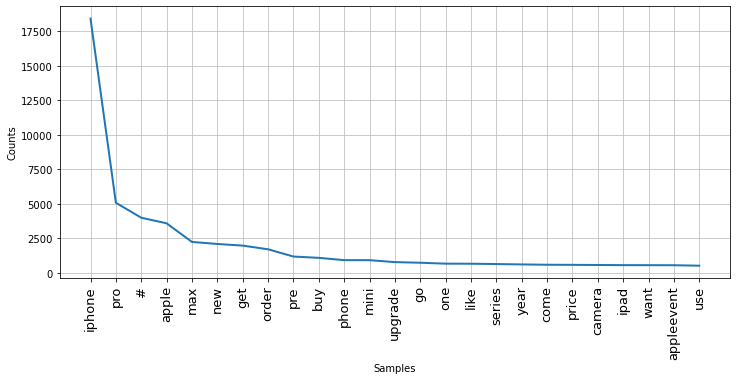

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

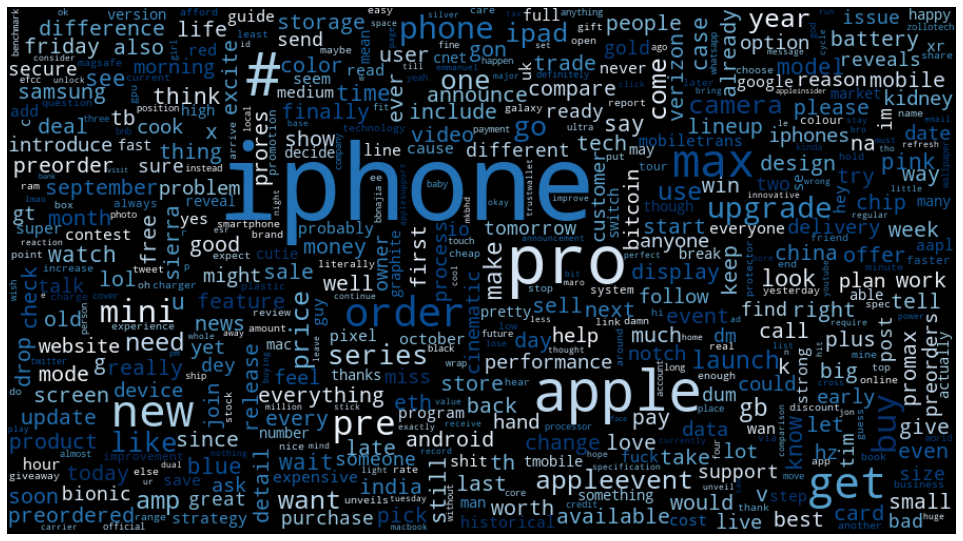

In [52]:

# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
# Remove 'apple, 'iphone', and '#'

def finish_cleaning(dataframe):
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('apple',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('iphone',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('#',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('phone',''))

In [54]:
finish_cleaning(tweets_df)

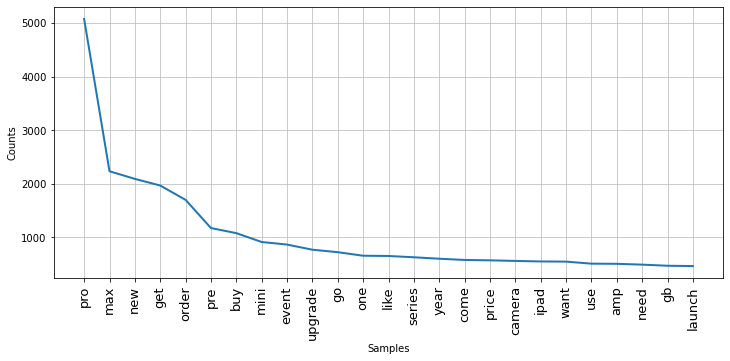

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets_df.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

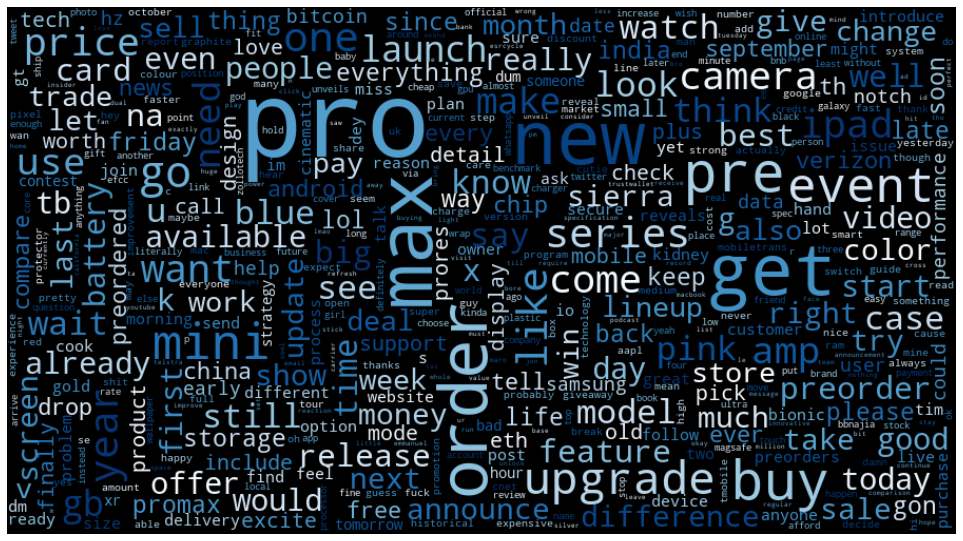

In [56]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
# Find the frequency of each word in the dataframe

word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

,Word,Count
52,pro,5073
63,max,2233
16,new,2091
68,get,1967
73,order,1700
72,pre,1174
97,buy,1079
17,mini,914
21,event,866
133,upgrade,770


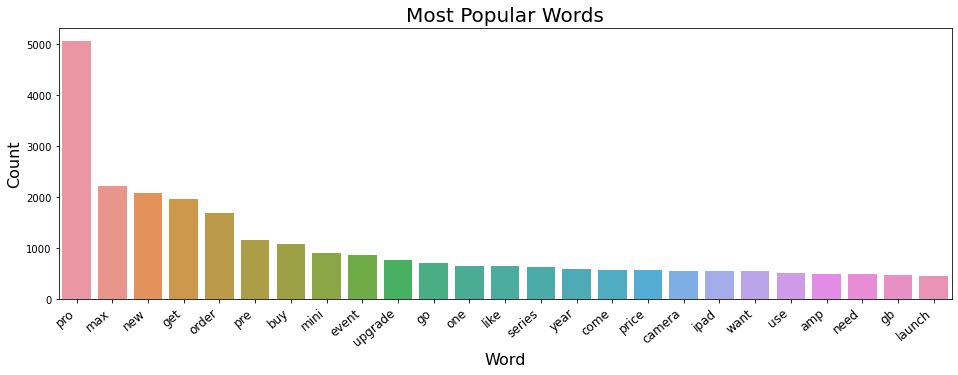

In [58]:
# Plot histogram of most frequent words

freq_df = freq_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Word', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.show()

In [59]:
tweets_df.to_csv('iPhoneTweetsInitial_cleaned.csv')